# Generalization to a general interevent interval

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw as pwl
from matplotlib import cm
from statsmodels.regression import linear_model as sm
from scipy.signal import find_peaks
from scipy import signal
from scipy.stats import percentileofscore
import numpy as np

In [9]:
#### Code like Wessel et al. 2015, Nature Physics: non riesco mi sa

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def OU(T,dt, tau, sigma):
    N = int(T/dt)
    x = np.zeros(N)
    for t in range(N-1):
        x[t+1] = x[t] -x[t]/tau*dt + sigma*np.random.normal()*np.sqrt(dt)
    return x

In [12]:
T = 1000
dt = 0.002
### I'm running two Ornstein Uhlenbeck processes to simulate two EEG signals (working as if I have two channels)
x1 = OU(T,dt,4,3)

In [13]:
T = 1000
dt = 0.002
### I'm running two Ornstein Uhlenbeck processes to simulate two EEG signals (working as if I have two channels)
x1 = OU(T,dt,4,3)
x2 = OU(T,dt,4,3)
x3 = OU(T,dt,4,3)
x4 = OU(T,dt,4,3)
x5 = OU(T,dt,4,3)
x6 = OU(T,dt,4,3)
x7 = OU(T,dt,4,3)
x8 = OU(T,dt,4,3)


channels = np.array([x1,x2,x3,x4,x5,x6,x7,x8])
channels.shape

(8, 500000)

In [14]:
#8000*0.001

In [15]:
np.arange(0,5,)

array([0, 1, 2, 3, 4])

In [16]:
t = np.arange(0,T,dt)
t.shape[0]/500

1000.0

In [32]:

thr = 2
o = 0
final_t = np.zeros(channels[0].shape)
#o = 0
for i in channels:
    final_t += np.array(np.abs(i)> np.std(i)*thr, dtype = float)
    o+= 1
#print(o)
final_t = np.array(final_t, dtype = bool)
final_t = np.array(final_t, dtype = float)

final_t.shape, channels.shape

((500000,), (8, 500000))

In [49]:
### Generalizzazione a un intervallo generico

interv = int(1) ## non può essere + alto di frequenza di campionamento
# 5 secondi

if len(final_t)%interv > 0:

    add = (int(len(final_t)/interv) + 1)* interv - len(final_t)
    final_t = final_t.tolist()
    for i in range(add):
        final_t+= [0]

final_t = np.asarray(final_t).reshape(int(len(final_t)/interv), interv)
new = np.array(np.array(np.sum(final_t,axis = 1),dtype = bool), dtype = float)

final_t.shape,new.shape

((500000, 1), (500000,))

In [21]:
new

array([0., 0., 1., ..., 1., 1., 1.])

In [50]:


av_indice_start = np.where(np.diff(new) >0)[0]### these are the indices where an avalanche begins
av_indice_end = np.where(np.diff(new)< 0)[0]### these are the indices where an avalanche ends + 1
#new = np.array(np.sum(n,axis = 1),dtype = int)
print(len(av_indice_start),len(av_indice_end))

4001 4000


In [35]:

from matplotlib import cm
colors = cm.Reds(np.linspace(0.2,1,8))

In [270]:
av_indice_start,av_indice_end

In [93]:
if len(av_indice_start) < len(av_indice_end):
    av_indice_start = np.insert(av_indice_start,0,0)
    
    
if len(av_indice_start) > len(av_indice_end):
    #print(av_indice_end)
    av_indice_end = np.append(av_indice_end,len(x1[::interv]))

In [47]:
len(av_indice_start),  len(av_indice_end)

(4001, 4001)

In [273]:
1000/len(final_t)

0.9891196834817013

In [274]:
(500*0.9)

450.0

In [52]:

newchan = []
for h in range(channels.shape[0]):
    if len(channels[h])%interv > 0:

        add = (int(len(channels[h])/interv) + 1)* interv - len(channels[h])
        cc = channels[h].tolist()
        for i in range(add):
            cc+= [0]

        dd = np.asarray(cc).reshape(int(len(cc)/interv), interv)
        #print(dd.shape)
        newchan.append(np.mean(dd,axis = 1))
        
        
    else:
        dd = np.asarray(channels[h]).reshape(int(len(channels[h])/interv), interv)
        #print(dd.shape)
        newchan.append(np.mean(dd,axis = 1))
        

In [53]:
newchan = np.asarray(newchan)

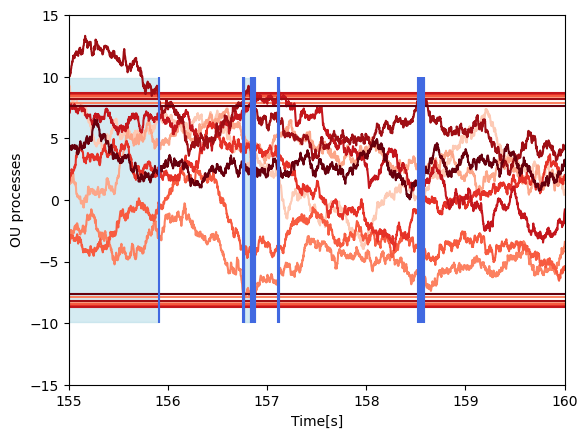

In [54]:
### HO CAMPIONATO
#interv = 0.5*500
for g in range(len(channels)):
    plt.plot(t[::interv],newchan[g],color = colors[g])
    plt.hlines(np.std(channels[g])*thr, 0,T,color = colors[g])
    plt.hlines(-np.std(channels[g])*thr, 0,T,color = colors[g])
    
for jj in range(len(av_indice_start)):
    #plt.fill_between(np.arange(t[av_indice_start[jj]],t[av_indice_end[jj]] + 0.002,0.002),-10,10, color = 'lightblue', alpha = .5)
    plt.axvspan(t[::interv][av_indice_start[jj]],t[::interv][av_indice_end[jj]],0.17,1-0.17, color = 'lightblue', alpha = .5)

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha = )
plt.vlines(t[::interv][av_indice_start],-10,10, color = 'royalblue')
plt.vlines(t[::interv][av_indice_end],-10,10, color = 'royalblue')

plt.xlabel('Time[s]')
plt.ylabel('OU processes');
plt.xlim(155,160);

plt.ylim(-15,15);

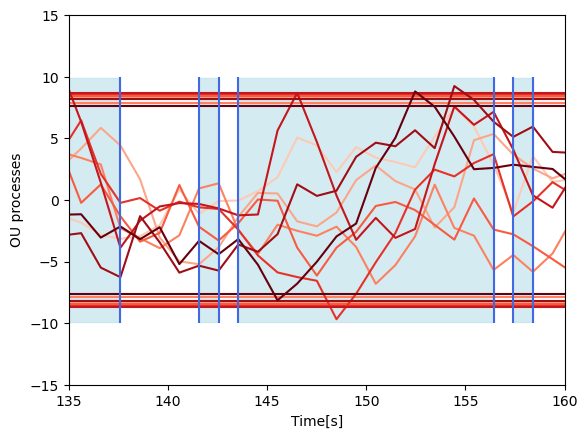

In [29]:
### HO CAMPIONATO
#interv = 0.5*500
for g in range(len(channels)):
    plt.plot(t[::interv],newchan[g],color = colors[g])
    plt.hlines(np.std(channels[g])*thr, 0,T,color = colors[g])
    plt.hlines(-np.std(channels[g])*thr, 0,T,color = colors[g])
    
for jj in range(len(av_indice_start)):
    #plt.fill_between(np.arange(t[av_indice_start[jj]],t[av_indice_end[jj]] + 0.002,0.002),-10,10, color = 'lightblue', alpha = .5)
    plt.axvspan(t[::interv][av_indice_start[jj]],t[::interv][av_indice_end[jj]],0.17,1-0.17, color = 'lightblue', alpha = .5)

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha = )
plt.vlines(t[::interv][av_indice_start],-10,10, color = 'royalblue')
plt.vlines(t[::interv][av_indice_end],-10,10, color = 'royalblue')

plt.xlabel('Time[s]')
plt.ylabel('OU processes');
plt.xlim(135,160);

plt.ylim(-15,15);

In [55]:
interv

1

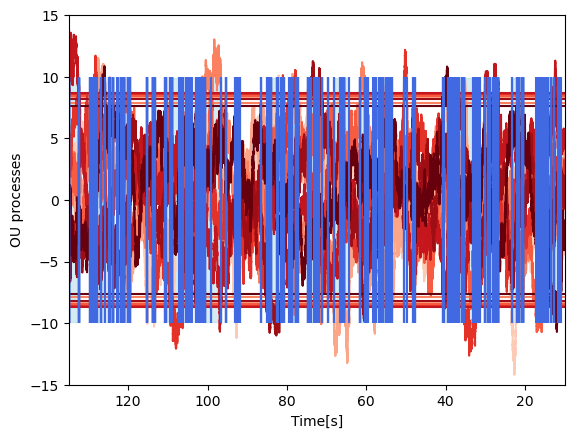

In [56]:
### HO CAMPIONATO
#interv = 0.99*500
for g in range(len(channels)):
    plt.plot(t[::interv],newchan[g],color = colors[g])
    plt.hlines(np.std(channels[g])*thr, 0,T,color = colors[g])
    plt.hlines(-np.std(channels[g])*thr, 0,T,color = colors[g])
    
for jj in range(len(av_indice_start)):
    #plt.fill_between(np.arange(t[av_indice_start[jj]],t[av_indice_end[jj]] + 0.002,0.002),-10,10, color = 'lightblue', alpha = .5)
    plt.axvspan(t[::interv][av_indice_start[jj]],t[::interv][av_indice_end[jj]],0.17,1-0.17, color = 'lightblue', alpha = .5)

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha = )
plt.vlines(t[::interv][av_indice_start],-10,10, color = 'royalblue')
plt.vlines(t[::interv][av_indice_end],-10,10, color = 'royalblue')

plt.xlabel('Time[s]')
plt.ylabel('OU processes');
plt.xlim(135,10);
plt.ylim(-15,15);

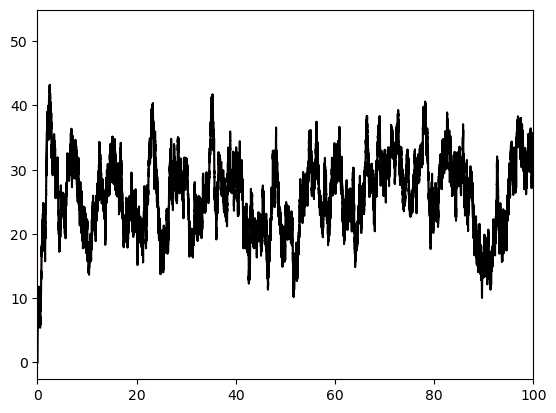

In [57]:
global_signal = np.zeros(channels[0].shape)
for i in channels:
    global_signal+= np.abs(i)
    
#plt.plot(t,np.abs(x1) )
#plt.plot(t,np.abs(x2) )
plt.plot(t,global_signal,'r' , lw  =1)




if len(global_signal)%interv > 0:

    add = (int(len(global_signal)/interv) + 1)* interv - len(global_signal)
    global_signal = global_signal.tolist()
    for i in range(add):
        global_signal+= [0]

global_signal2 = np.asarray(global_signal).reshape(int(len(global_signal)/interv), interv)
gglobal_signal2 = np.mean(global_signal2,axis = 1)


plt.plot(t[::interv],gglobal_signal2,'k' )
plt.xlim(0,100);


In [67]:
t[::1].shape

(500000,)

In [68]:
global_signal = np.zeros(channels[0].shape)




interv = 1
#int(500*0.99) ## non può essere + alto di frequenza di campionamento
# 5 secondi


for i in channels:
    global_signal+= np.abs(i)
print(global_signal.shape)

if len(global_signal)%interv > 0:

    add = (int(len(global_signal)/interv) + 1)* interv - len(global_signal)
    global_signal = global_signal.tolist()
    for i in range(add):
        global_signal+= [0]

global_signal2 = np.asarray(global_signal).reshape(int(len(global_signal)/interv), interv)
gglobal_signal2 = np.mean(global_signal2,axis = 1)
    
print(gglobal_signal2.shape, t[::interv].shape)
avalanche_sizes = []
avalanche_dur = []

for s in range(len(av_indice_start)):
    if len(av_indice_start) != len(av_indice_end):
        print('Error, they must be of the same length')
        break
    avalanche_sizes.append(np.sum(gglobal_signal2[av_indice_start[s]:av_indice_end[s]]))
    avalanche_dur.append(t[::interv][av_indice_end[s]]- t[av_indice_start[s]])
    

(500000,)
(500000,) (500000,)


In [69]:

def binning(n, interv): 
    """
    Bins the data with the temporal bin "interv" and detects avalanches (one avalanche ends when an empty bin is found)
    
    Parameters
    n : # of events in each temporal frame (returned by the function "events")
    interv : temporal bin. Typical width is the one of the average inter event interval (returned by "avinterv")
    --------
    Returns
    --------
    A list containing the sizes of the avalanches and a list containing the durations of the avalanches.
    """
    
    if len(n)%interv > 0:
    
        add = (int(len(n)/interv) + 1)* interv - len(n)
        n = n.tolist()
        for i in range(add):
            n = n + [0]
        
    n = np.asarray(n).reshape(int(len(n)/interv), interv)
    
    new = np.array(np.sum(n,axis = 1),dtype = int)
    
    init = []
    end = []
 
    prova = new>0
    
    start = np.where(np.diff(prova)>1)[0]
    end = np.where(np.diff(prova)<1)[0]
    
    
    if len(start)< len(end):
        np.insert(start,0,0)
        
    
    if len(end)< len(start):
        np.insert(end,-1,0)
            
    avalanches = []

    for s in range(len(init)):
        avalanches.append(new[start[s]:end[s]])

    sizes = []
    durations = []
    for l in range(len(avalanches)):
        sizes.append(np.sum(avalanches[l]))
        durations.append(len(avalanches[l]))
        
    return sizes, durations

    

In [96]:
def thresholdnuova(sample1,means,stds,thres):
    """ 
    Detects as events the points of maximum excursion over a threshold, considering either positive and negative excursions or only negative. if "option1" is selected, the one largest maximum between two crossings of the mean assigns the final event time.
    For a faster thresholding use the function below findpeaks.
    
    Parameters
    --------
    sample1 : tri or bidimensional array of recorded voltages (or even single time series from one electrode) (shape = temporal dim x spatial dim1 (x  spatial dim2) ) 
    means : array of the means of the signals (shape = spatial dim1 (x spatial dim2) ) 
    stds : array of the thresholds for each channel (standard deviations/medians...) (shape = spatial dim1 (x spatial dim2)
    thres : multiplicative coefficent for the thresholds
    choose : if "posneg" both positive and negative deflections are considered, if "neg" only negative
    opz : if "option1" the one largest maximum between two crossings of the mean assigns the final event time, if "option2" an event is simply the point of maximum excursion over a threshold
    
    Returns
    --------
    sample2 : discretized array with the initial shape 
    """
    initshape = sample1.shape
    if sample1.ndim > 2:
        sample1 = sample1.reshape(sample1.shape[0],-1)
        means = means.reshape(-1,)
        stds = stds.reshape(-1,)
        
    if sample1.ndim == 1: # so this same code works even when considering a single time series
        sample1 = sample1.reshape(sample1.shape[0],1,1)
        means = means.reshape(1,1)
        stds = stds.reshape(1,1)
        
    if sample1.shape[1] > sample1.shape[0]:
         raise Exception('Error, the array must be transposed (first dimension should be time)')

    sample2 = np.zeros(sample1.shape, dtype = int)

    for s in range(sample1.shape[1]):
        if stds[s]>0:
            sig = sample1[:,s].reshape(-1)
            stan = stds[s]
            tempi = np.arange(0,len(sig),1)
            prova =np.array((sig - means[s]) <= -thres*stan, dtype = float)
            init = np.where(np.diff(prova)>0)[0]
            end = np.where(np.diff(prova)<0)[0] +1 
            if len(init) < len(end):
                init = np.insert(init,0,0)

            if len(end) < len(init):
                end = np.append(end,len(sig))

            #print(len(init), len(end))
            groups = []
            times = []
            for l in range(len(init)):
                groups.append(np.abs(sig[init[l]:end[l]]-means[s]))##
                times.append(tempi[init[l]:end[l]])
            #print(groups)
            zeta = []
            for m in range(len(groups)):
                zeta.append(times[m][groups[m].tolist().index(max(groups[m]))])
            sample2[zeta,s] = 1
            
    return sample2.reshape(initshape)

In [97]:
v = thresholdnuova(x1, np.mean(x1), np.std(x1),1)

In [318]:
np.mean(x1), np.std(x1)

(0.2882117341805754, 4.185437212356734)

In [99]:
total = np.arange(0,T,dt)

In [323]:
v

array([0, 0, 0, ..., 0, 0, 0])

(30.0, 50.0)

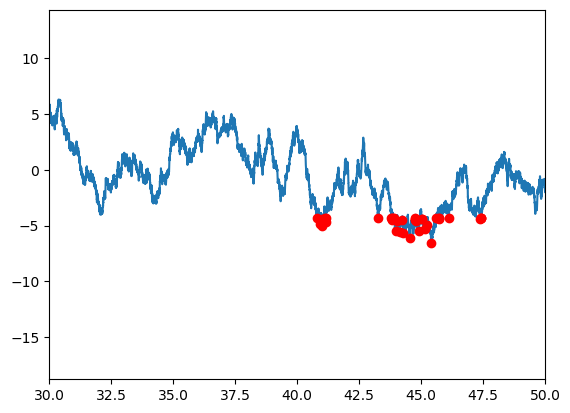

In [103]:
plt.plot(total, x1)
plt.plot(total[v>0], x1[v>0], 'ro')
plt.xlim(30,50)

In [163]:
def thresholdnuova2(sample1,means,stds,thres):
    """ 
    Detects as events the points of maximum excursion over a threshold, considering either positive and negative excursions or only negative. if "option1" is selected, the one largest maximum between two crossings of the mean assigns the final event time.
    For a faster thresholding use the function below findpeaks.
    
    Parameters
    --------
    sample1 : tri or bidimensional array of recorded voltages (or even single time series from one electrode) (shape = temporal dim x spatial dim1 (x  spatial dim2) ) 
    means : array of the means of the signals (shape = spatial dim1 (x spatial dim2) ) 
    stds : array of the thresholds for each channel (standard deviations/medians...) (shape = spatial dim1 (x spatial dim2)
    thres : multiplicative coefficent for the thresholds
    choose : if "posneg" both positive and negative deflections are considered, if "neg" only negative
    opz : if "option1" the one largest maximum between two crossings of the mean assigns the final event time, if "option2" an event is simply the point of maximum excursion over a threshold
    
    Returns
    --------
    sample2 : discretized array with the initial shape 
    """
    initshape = sample1.shape
    if sample1.ndim > 2:
        sample1 = sample1.reshape(sample1.shape[0],-1)
        means = means.reshape(-1,)
        stds = stds.reshape(-1,)
        
    if sample1.ndim == 1: # so this same code works even when considering a single time series
        sample1 = sample1.reshape(sample1.shape[0],1,1)
        means = means.reshape(1,1)
        stds = stds.reshape(1,1)
        
    if sample1.shape[1] > sample1.shape[0]:
         raise Exception('Error, the array must be transposed (first dimension should be time)')

    sample2 = np.zeros(sample1.shape, dtype = int)

    for s in range(sample1.shape[1]):
        if stds[s]>0:
            sig = sample1[:,s].reshape(-1)
            stan = stds[s]
            tempi = np.arange(0,len(sig),1)
            prova =np.array((sig - means[s]) <= -thres*stan, dtype = float)
            
            changesign = np.diff(np.sign(sig[:]-means[s]))
            
            
            #changesign1 = np.hstack((changesign1,0.))
            

            initsign = np.where((changesign)>0)[0]
            endsign = np.where((changesign)<0)[0]

            init = np.where(np.diff(prova)>0)[0]
            end = np.where(np.diff(prova)<0)[0] + 1
            #print(len(initsign) ==len(endsign))
            #print(len(sig),len(initsign),len(init), len(end))
            if len(init) < len(end):
                init = np.insert(init,0,0)

            if len(end) < len(init):
                end = np.append(end,len(sig))

            #print(init, end)
            groups = []
            times = []
            
            #intss = []
            #endss = []
            
                        
            initss = []
            endss = []

            a = 0
            f = 0
            k = 0
            endss = []
            initss = []
            #g = 0 
            while f < len(end):
                if not len((set(np.arange(init[a], end[f],1)) & set(initsign[:]))):
                    k+=1
                    f+=1

                else:
                    if k> 0:
                        endss.append(end[f])
                        initss.append(init[a])
                        a += k
                        k = 0
                        f+=1
                    else:
                        a += 1
                        f+=1  
            for l in range(len(initss)):
                groups.append((sig[initss[l]:endss[l]]-means[s]))##
                times.append(tempi[initss[l]:endss[l]])
            zeta = []
            for m in range(len(groups)):
                zeta.append(times[m][groups[m].tolist().index(min(groups[m]))])
            sample2[zeta,s] = 1
            
    return sample2.reshape(initshape)

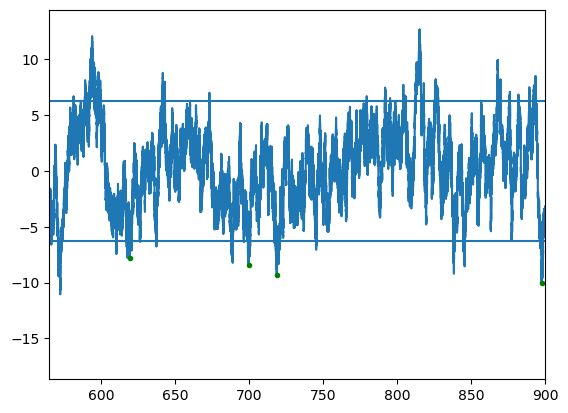

In [164]:
v = thresholdnuova(x1,np.mean(x1),np.std(x1),1.5)

v2 = thresholdnuova2(x1,np.mean(x1),np.std(x1),1.5)

plt.plot(total, x1-np.mean(x1))
plt.plot(total[v2>0], (x1-np.mean(x1))[v2>0], 'go',markersize = 3)


#plt.xlim(86,89)
plt.xlim(565,900)
plt.hlines( np.std(x1)*1.5,0,1000)
plt.hlines( -np.std(x1)*1.5,0,1000)

In [166]:
v = thresholdnuova(x1,np.mean(x1),np.std(x1),1.5)

v2 = thresholdnuova2(x1,np.mean(x1),np.std(x1),1.5)

(100.0, 200.0)

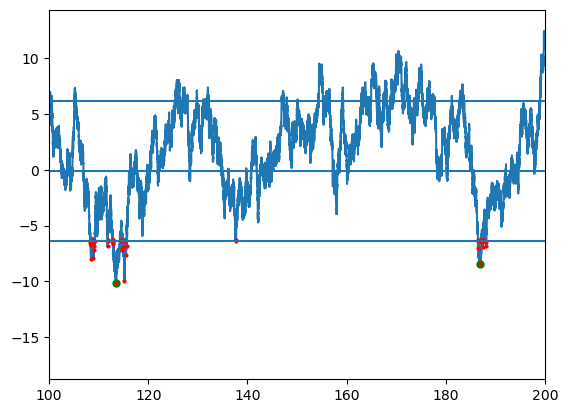

In [167]:
#v = thresholdnuova(x1,np.mean(x1),np.std(x1),2.5)
plt.plot(total, x1)

plt.plot(total[v2>0], (x1-np.mean(x1))[v2>0], 'go',markersize = 5)


plt.plot(total[v>0], (x1-np.mean(x1))[v>0], 'ro',markersize = 2)




plt.hlines(np.mean(x1) + np.std(x1)*1.5,0,1000)
plt.hlines(np.mean(x1) ,0,1000)

plt.hlines(np.mean(x1) -np.std(x1)*1.5,0,1000)
#v2 = thresholdnuova2(x1,np.mean(x1),np.std(x1),2.5)


#plt.plot(total, x1-np.mean(x1))

plt.xlim(100,200)

(400.0, 500.0)

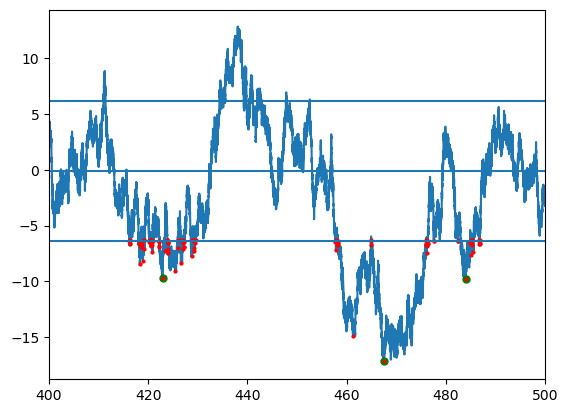

In [168]:
#v = thresholdnuova(x1,np.mean(x1),np.std(x1),2.5)
plt.plot(total, x1)

plt.plot(total[v2>0], (x1-np.mean(x1))[v2>0], 'go',markersize = 5)


plt.plot(total[v>0], (x1-np.mean(x1))[v>0], 'ro',markersize = 2)




plt.hlines(np.mean(x1) + np.std(x1)*1.5,0,1000)
plt.hlines(np.mean(x1) ,0,1000)

plt.hlines(np.mean(x1) -np.std(x1)*1.5,0,1000)
#v2 = thresholdnuova2(x1,np.mean(x1),np.std(x1),2.5)


#plt.plot(total, x1-np.mean(x1))

plt.xlim(400,500)

(0.0, 40.0)

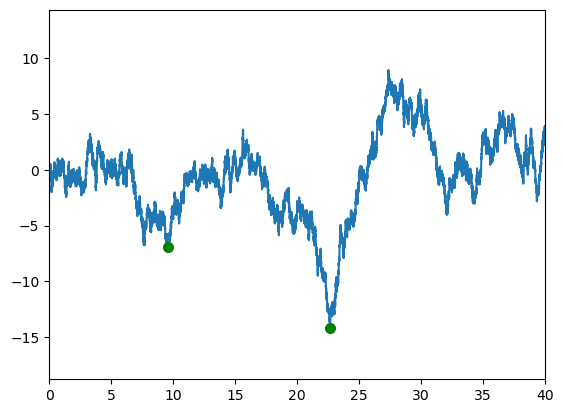

In [144]:
plt.plot(total, x1)


plt.plot(total[v2>0], x1[v2>0], 'go', markersize = 7)
plt.xlim(0,40)